In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

plt.style.use('../glfharris.mplstyle')

In [2]:
# Defines the infusion rate / min across models
def inf_rate(x):
    if x <= 5:
        return 0.3
    else:
        return 0

# Default volumes
V1 = 5

# Default rate elimination constants
k10 = 0.1

# Default duration
duration = 30 # minutes
t = np.linspace(0, duration, duration*60)

# Zero Order Elimination

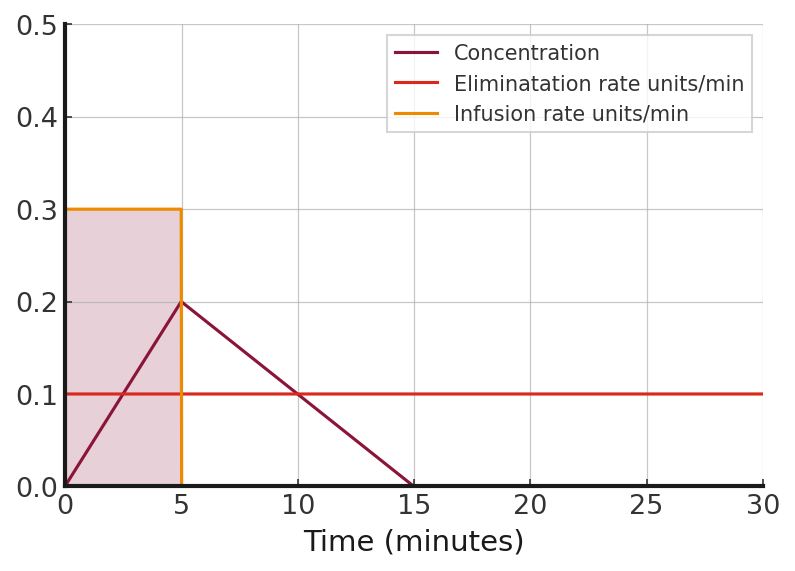

In [3]:
C1 = 0.0

C1_results = []
inf_rates = []
elim_rates = []

elim_rate = 0.1

for x in t:
    
    dC1dt = - elim_rate / (V1 * 60)
    
    C1 += dC1dt + inf_rate(x) / (V1 * 60)
    
    C1_results.append(C1)
    inf_rates.append(inf_rate(x))
    elim_rates.append(elim_rate)

plt.plot(t, C1_results, label="Concentration")
plt.plot(t, elim_rates, label="Eliminatation rate units/min")
plt.plot(t, inf_rates, label="Infusion rate units/min")
plt.fill_between(t, inf_rates,alpha=0.2)
plt.xlabel('Time (minutes)')
plt.xlim([0,duration])
plt.ylim([0,0.5])
plt.legend()
plt.savefig('plots/zero-order.png', transparent=True)
plt.show()

# First Order Elimination

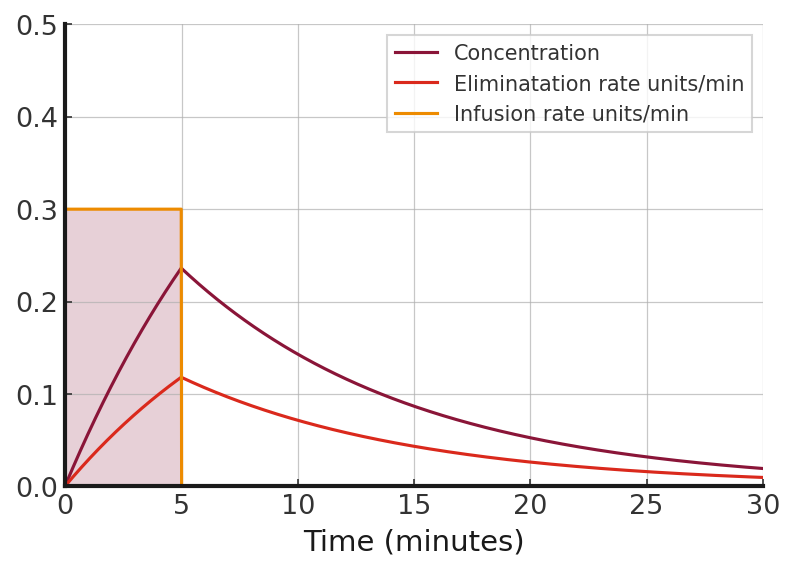

In [4]:
C1 = 0.0

C1_results = []
inf_rates = []
elim_rates = []

for x in t:
    dC1dt = - (k10 * C1 * V1) / (V1 * 60)
    
    C1 += dC1dt + inf_rate(x) / (V1 * 60)
    
    C1_results.append(C1)
    elim_rates.append(k10 * C1 * V1)
    inf_rates.append(inf_rate(x))
    
plt.plot(t, C1_results, label="Concentration")
plt.plot(t, elim_rates, label="Eliminatation rate units/min")
plt.plot(t, inf_rates, label="Infusion rate units/min")

plt.fill_between(t, inf_rates,alpha=0.2)
plt.xlabel('Time (minutes)')
plt.xlim([0,duration])
plt.ylim([0,0.5])
plt.legend()
plt.savefig('plots/first-order.png', transparent=True)
plt.show()

# Comparison

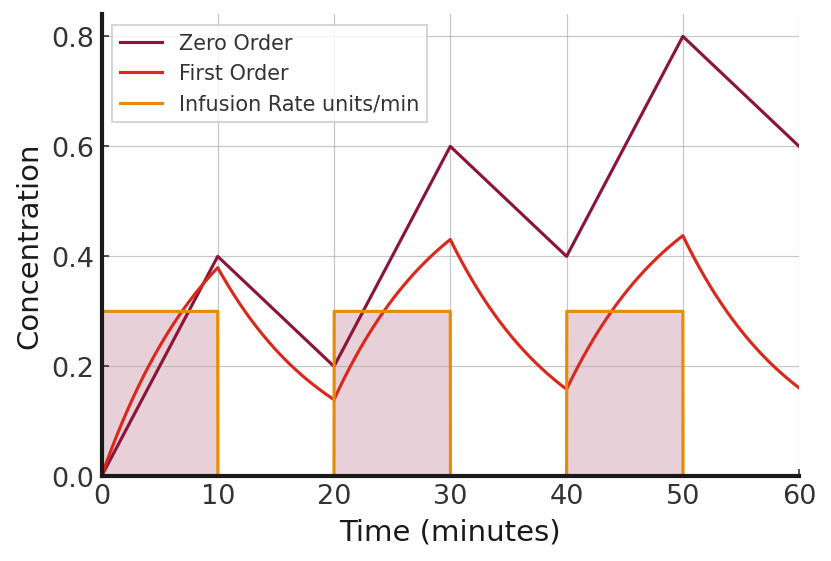

In [7]:
def inf_rate(x):
    if x <= 10:
        return 0.3
    elif 20 < x <= 30:
        return 0.3
    elif 40 < x <= 50:
        return 0.3
    else:
        return 0

duration= 60
t = np.linspace(0,duration,duration*60)

results={}
results["First"] = []
results["Zero"] = []
results["Infusion"] = []

C1 = 0.0
for x in t:
    dC1dt = - (k10 * C1 * V1) / (V1 * 60)
    
    C1 += dC1dt + inf_rate(x) / (V1 * 60)
    
    results["First"].append(C1)
    results["Infusion"].append(inf_rate(x))
    
elim_rate = 0.1
C1 = 0.0
for x in t:
    dC1dt = - elim_rate / (V1 * 60)
    
    C1 += dC1dt + inf_rate(x) / (V1 * 60)
    
    results["Zero"].append(C1)

plt.plot(t, results["Zero"],label="Zero Order")
plt.plot(t, results["First"], label="First Order")
plt.plot(t, results["Infusion"], label="Infusion Rate units/min")
plt.xlim([0,duration])
plt.ylim(bottom=0)

plt.fill_between(t, results["Infusion"], alpha=0.2)

plt.xlabel("Time (minutes)")
plt.ylabel("Concentration")
plt.legend()
plt.show()

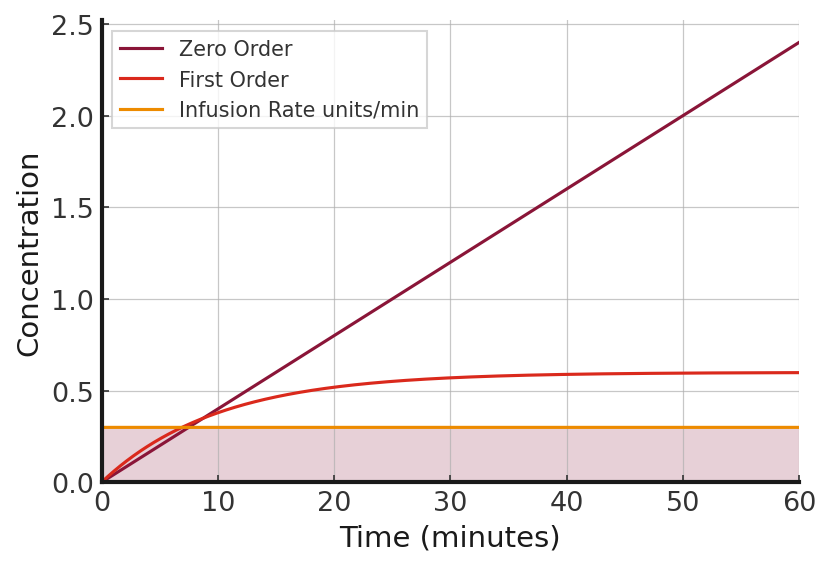

In [8]:
def inf_rate(x):
    return 0.3

duration= 60
t = np.linspace(0,duration,duration*60)

results={}
results["First"] = []
results["Zero"] = []
results["Infusion"] = []

C1 = 0.0
for x in t:
    dC1dt = - (k10 * C1 * V1) / (V1 * 60)
    
    C1 += dC1dt + inf_rate(x) / (V1 * 60)
    
    results["First"].append(C1)
    results["Infusion"].append(inf_rate(x))
    
elim_rate = 0.1
C1 = 0.0
for x in t:
    dC1dt = - elim_rate / (V1 * 60)
    
    C1 += dC1dt + inf_rate(x) / (V1 * 60)
    
    results["Zero"].append(C1)

plt.plot(t, results["Zero"],label="Zero Order")
plt.plot(t, results["First"], label="First Order")
plt.plot(t, results["Infusion"], label="Infusion Rate units/min")
plt.xlim([0,duration])
plt.ylim(bottom=0)

plt.fill_between(t, results["Infusion"], alpha=0.2)

plt.xlabel("Time (minutes)")
plt.ylabel("Concentration")
plt.legend()
plt.show()